In [2]:
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_csv('.data/ML Assignment Dataset - Train.csv')

In [4]:
df.emotion_in_tweet_is_directed_at.unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [5]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Lets add some more features. 

Using calculating sentiment polarity using TextBlob. 

In [6]:
df['tweet_text'].fillna('', inplace=True) # Was Getting error for NaN values while calculating polarity
df['tweet_len'] = df['tweet_text'].astype(str).apply(len)
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
df['polarity'] = df['tweet_text'].map(lambda text: TextBlob(text).sentiment.polarity)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_len,word_count,polarity
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,-0.250000
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,0.466667
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,-0.155556
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,0.000000
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,0.800000
...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29,4,0.000000
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125,18,0.000000
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145,19,0.000000
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140,23,-0.054545


Sanity checks on polarity:

In [7]:
print('5 random tweets with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['tweet_text']].sample(5).values
for c in cl:
    print(c[0])

5 random tweets with the highest positive sentiment polarity: 

Just had my 1st 27&quot; LCD cinema display FaceTime to IPad 2 FaceTime with @mention ... #sxsw bar in my living room lol!
Hey #sxsw goers! I'm droppin survival tips all week to help you get you rock on!  Best hangover cure: Tamale House 3! {link}
Ok,I have seen two impressive lines since I'm at #SXSW  the one at the Apple Store yesterday. &amp; the @mention party now cc @mention
RT @mention Win an iPad 2 ~ BizGym Video ClipCon! See intro reel at {link} #sxsw #suasxsw #sxswaccel #ceokidschat #entrepreneur #smallbiz
@mention great news for u and @mention and the TWiT crew. Apple is building a temporary Store for #SXSW 2011 so u can get ur ipad 2s !!


In [8]:
print("5 random tweets with lowest sentimet polarity")
cl = df.loc[df.polarity == -1, ['tweet_text']].sample(5).values
for c in cl:
    print(c[0])

5 random tweets with lowest sentimet polarity
@mention 2 heck w/being sick, #Apple is supposedly setting up mini-store at #sxsw - I so have to go now!! &amp; I'm feeling 95%, so plan 2 go
Line of ppl around the block. #sxsw party? No, Apple store! Insane!  {link}
RT @mention Line of ppl around the block. #sxsw party? No, Apple store! Insane!  {link}
Pop-up Apple Store to sell ipad2 at #SxSW. The line is insane!  {link}
My ipad 2 vs Android panel starts at 330 at Radisson. Bloody Mary starts now! #SXSW


Plotting Polarity   

In [9]:
# Linking plotly to pandas

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)




df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

Looks like the majority of the tweets are neutral.

Also let us see the distribution of tweet word counts

In [10]:
df['tweet_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [11]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

Now lets explore what are the top uni,bi,tri grams before and after removing stop words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['tweet_text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])
df1.groupby('tweet_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

sxsw 9108
mention 6739
the 4209
link 4121
to 3419
at 2942
rt 2819
google 2496
for 2424
ipad 2383
apple 2225
in 1872
of 1609
is 1599
quot 1591
and 1563
iphone 1484
store 1416
on 1249
up 1217


Looks like the data is about people attending south by southwest and tweetig about Google and Apple.

In [13]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['tweet_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])
df2.groupby('tweet_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

sxsw 9108
mention 6739
link 4121
rt 2819
google 2496
ipad 2383
apple 2225
quot 1591
iphone 1484
store 1416
new 1037
austin 929
amp 806
app 777
social 627
circles 626
launch 623
pop 566
android 565
today 559


In [14]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['tweet_text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])
df3.groupby('tweet_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

rt mention 2741
at sxsw 1766
sxsw link 864
link sxsw 730
for sxsw 588
apple store 559
pop up 554
mention mention 498
at the 434
social network 429
mention sxsw 413
an ipad 407
new social 394
in austin 368
the ipad 368
mention google 364
to launch 359
store in 348
via mention 333
up store 319


In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['tweet_text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])
df4.groupby('tweet_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

rt mention 2741
sxsw link 885
link sxsw 739
mention mention 599
mention sxsw 573
apple store 561
mention google 436
social network 429
new social 395
pop store 319
google launch 318
store sxsw 311
network called 308
austin sxsw 305
sxsw mention 303
link mention 301
called circles 299
major new 280
iphone app 275
launch major 272


In [16]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['tweet_text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['tweet_text' , 'count'])
df5.groupby('tweet_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

new social network 369
pop up store 317
at sxsw link 311
social network called 307
network called circles 295
google to launch 291
major new social 280
launch major new 272
rt mention google 265
to launch major 262
austin for sxsw 223
mention rt mention 221
circles possibly today 220
called circles possibly 217
link via mention 217
store in austin 183
apple pop up 183
rt mention rt 181
mention google to 179
possibly today link 174


Top parts of speech

In [17]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


blob = TextBlob(str(df['tweet_text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for tweet corpus')

[nltk_data] Downloading package punkt to /home/k4czyns/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/k4czyns/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Now lets see how the semantic polarity is directed toward each of the company. We can also do it for products.

In [18]:
def get_company(input_str):
    lower_str = input_str.lower()

    google_words = ["google", "android", "play store"]

    apple_words = ["apple", "iphone", "ipad", "app store", "macbook", "imac"]

    google_present = any(word in lower_str for word in google_words)

    apple_present = any(word in lower_str for word in apple_words)

    if google_present and apple_present:
        return ["apple", "google"]
    elif google_present:
        return "google"
    elif apple_present:
        return "apple"
    else:
        return None

In [19]:
df['company'] = df['tweet_text'].apply(get_company)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_len,word_count,polarity,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,-0.250000,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,0.466667,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,-0.155556,apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,0.000000,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,0.800000,google
...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29,4,0.000000,apple
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125,18,0.000000,google
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145,19,0.000000,google
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140,23,-0.054545,apple


In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

x1 = df.loc[df['company'] == "apple", 'polarity']
x0 = df.loc[df['company'] == "google", 'polarity']

trace1 = go.Histogram(
    x=x0, name='Google',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Apple',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of based on Company')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [21]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_len,word_count,polarity,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,-0.250000,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,0.466667,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,-0.155556,apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,0.000000,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,0.800000,google
...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29,4,0.000000,apple
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125,18,0.000000,google
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145,19,0.000000,google
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140,23,-0.054545,apple


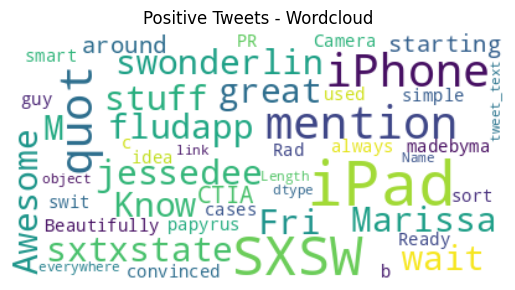

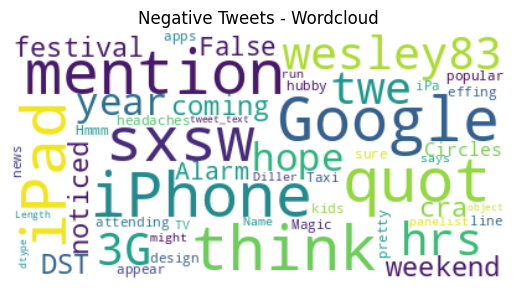

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
 
# Wordcloud with positive tweets
positive_tweets = df['tweet_text'][df["is_there_an_emotion_directed_at_a_brand_or_product"] == 'Positive emotion']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = df['tweet_text'][df["is_there_an_emotion_directed_at_a_brand_or_product"] == 'Negative emotion']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
sentiment_counts = df.groupby(['is_there_an_emotion_directed_at_a_brand_or_product']).size()
print(sentiment_counts)


is_there_an_emotion_directed_at_a_brand_or_product
I can't tell                             9
Negative emotion                       519
No emotion toward brand or product    5389
Positive emotion                      2672
dtype: int64


In [24]:
product_counts = df.groupby(['emotion_in_tweet_is_directed_at']).size()
print(product_counts)

emotion_in_tweet_is_directed_at
Android                             78
Android App                         81
Apple                              661
Google                             430
Other Apple product or service      35
Other Google product or service    293
iPad                               946
iPad or iPhone App                 470
iPhone                             297
dtype: int64


<Axes: >

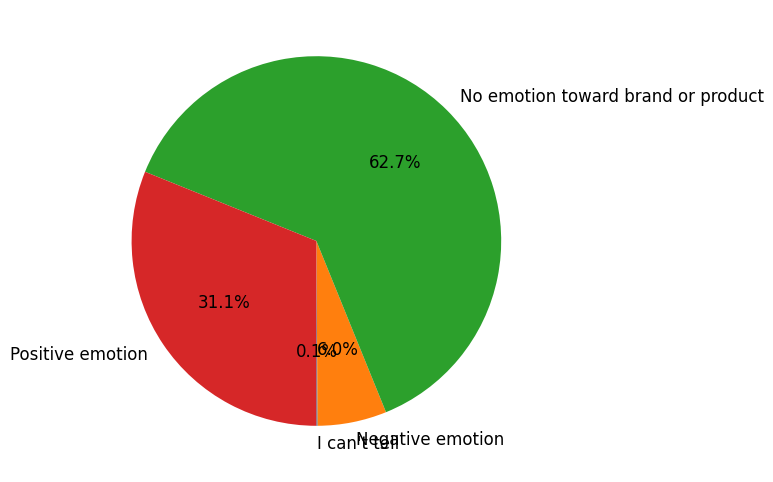

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

<Axes: >

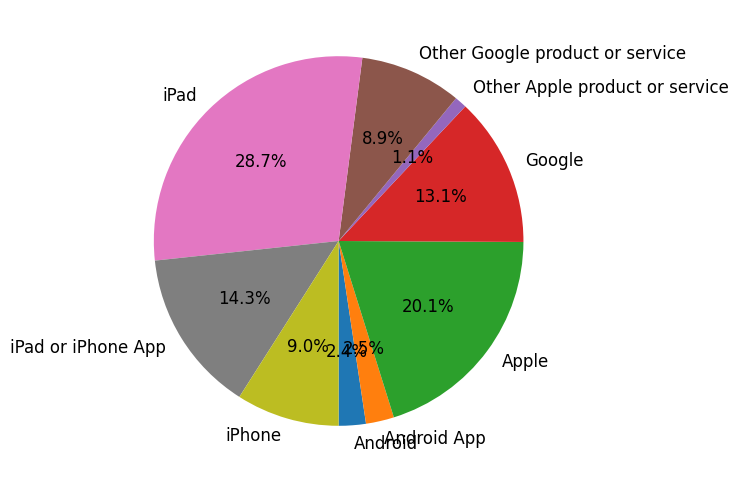

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
product_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [27]:
df.columns = df.columns.str.replace('is_there_an_emotion_directed_at_a_brand_or_product', 'sentiment') 
df.columns = df.columns.str.replace('emotion_in_tweet_is_directed_at', 'emotion_at')

In [28]:
df

,tweet_text,emotion_at,sentiment,tweet_len,word_count,polarity,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,-0.250000,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,0.466667,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,-0.155556,apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,0.000000,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,0.800000,google
...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29,4,0.000000,apple
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125,18,0.000000,google
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145,19,0.000000,google
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140,23,-0.054545,apple


In [29]:
df['sentiment'] = df['sentiment'].map({'Positive emotion': 1, 'Negative emotion': 2, 'No emotion toward brand or product': 3})

df['sentiment'] = df['sentiment'].fillna(0)
emotion_mapping = {
    'iPhone': 1,
    'iPad or iPhone App': 2,
    'iPad': 3,
    'Google': 4,
    'Android': 5,
    'Apple': 6,
    'Android App': 7,
    'Other Google product or service': 8,
    'Other Apple product or service': 9
}

# Replace the values in the 'emotion_at' column with their numerical counterparts
df['emotion_at'] = df['emotion_at'].map(emotion_mapping)

# If 'nan' is actually a NaN value, you can additionally handle NaN values like this:
df['emotion_at'] = df['emotion_at'].fillna(0)
df

,tweet_text,emotion_at,sentiment,tweet_len,word_count,polarity,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1.0,2.0,127,23,-0.250000,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2.0,1.0,139,22,0.466667,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,3.0,1.0,79,15,-0.155556,apple
3,@sxsw I hope this year's festival isn't as cra...,2.0,2.0,82,15,0.000000,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,4.0,1.0,131,17,0.800000,google
...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},3.0,1.0,29,4,0.000000,apple
8585,"Wave, buzz... RT @mention We interrupt your re...",0.0,3.0,125,18,0.000000,google
8586,"Google's Zeiger, a physician never reported po...",0.0,3.0,145,19,0.000000,google
8587,Some Verizon iPhone customers complained their...,0.0,3.0,140,23,-0.054545,apple


In [30]:
df

,tweet_text,emotion_at,sentiment,tweet_len,word_count,polarity,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1.0,2.0,127,23,-0.250000,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2.0,1.0,139,22,0.466667,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,3.0,1.0,79,15,-0.155556,apple
3,@sxsw I hope this year's festival isn't as cra...,2.0,2.0,82,15,0.000000,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,4.0,1.0,131,17,0.800000,google
...,...,...,...,...,...,...,...
8584,Ipad everywhere. #SXSW {link},3.0,1.0,29,4,0.000000,apple
8585,"Wave, buzz... RT @mention We interrupt your re...",0.0,3.0,125,18,0.000000,google
8586,"Google's Zeiger, a physician never reported po...",0.0,3.0,145,19,0.000000,google
8587,Some Verizon iPhone customers complained their...,0.0,3.0,140,23,-0.054545,apple


In [31]:
df.sentiment.unique()

array([2., 1., 3., 0.])

In [34]:
df.to_csv(".data/train.csv")

In [35]:
df.sentiment

0       2.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
8584    1.0
8585    3.0
8586    3.0
8587    3.0
8588    3.0
Name: sentiment, Length: 8589, dtype: float64

In [36]:
df.emotion_at.unique()

array([1., 2., 3., 4., 0., 5., 6., 7., 8., 9.])

In [37]:
df.sentiment.unique()

array([2., 1., 3., 0.])

In [228]:
df.to_csv("file99.csv")